<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/regper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction Scores: [-2.11681086 -0.9203372   3.86555746  1.47261013]
Prediction Labels: [-1. -1.  1.  1.]


/tmp/ipython-input-1-2812294953.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')


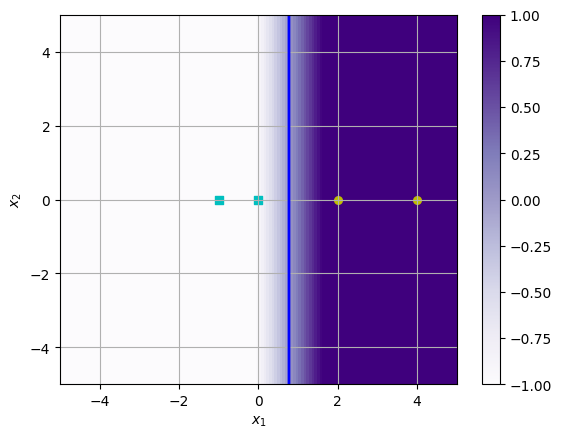

[1.19647366e+00 7.17423338e-05]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None:
            conts = list(classes)
        vmin,vmax = classes[0]-eps,classes[-1]+eps
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None:
            conts = sorted([-1+eps,0,1-eps])

    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)

        z = np.reshape(z,(npts,npts)).T


        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)

    if Y is not None:
        for i,y in enumerate(classes):
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 30)

    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    if not hold:
        plt.grid()
        plt.show()
    return extent
class RegularizedPerceptron:
    def __init__(self,Lambda = 0.0, margin = 1.0, alpha = 0.1, epochs = 1000):
        self.alpha = alpha
        self.epochs = epochs
        self.W = np.array([0])
        self.bias = np.random.randn()
        self.Lambda = Lambda #not used in perceptron
        self.Margin = margin #0.0 in Perceptron
    def fit(self,Xtr,Ytr):
        d = Xtr.shape[1]
        self.W = np.random.randn(d)
        for e in range(self.epochs):
            finished = True
            for i,x in enumerate(Xtr):
                if self.score(np.atleast_2d(x))*Ytr[i]<self.Margin:
                    self.W += self.alpha*Ytr[i]*x
                    self.bias += self.alpha*Ytr[i]

            self.W = self.W-self.alpha*self.Lambda*self.W #Regularization update

    def score(self,x):
        return np.dot(x,self.W) + self.bias

    def predict(self,x):
        return np.sign(self.score(x))

if __name__=='__main__':

    Xtr = np.array([[-1,0],[0,0],[4,0],[2,0]])#np.array([[-1,0],[0,1],[4,4],[2,3]])
    ytr = np.array([-1,-1,+1,+1])
    clf = RegularizedPerceptron(Lambda = 0.1, margin = 1.0)
    clf.fit(Xtr,ytr)
    z = clf.score(Xtr)
    print("Prediction Scores:",z)
    y = clf.predict(Xtr)
    print("Prediction Labels:",y)
    plotit(Xtr,ytr,clf=clf.score,conts=[0],extent = [-5,+5,-5,+5])
    print(clf.W)


In [ ]:
~